## Notebook to start making projections over the twenty first century


This notebook is used to make projections of the wind influence on sea level rise in the 21th century. 



From the regression between zos and vas/uas (cmip6 data) the regression coefficients are used to make predictions into the 21st century (files: nearby_wind_regression_cmip6, timmerman_regression_cmip6, dangendorf_regression_cmip6). Only models are used that perform well according to spectral analysis (file: comparison). 


Currently, the analysed scenarios are 2.6, 4.5 and 8.5

In [363]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Projections/code')

import import_data as imprt
import projections as proj
import figures as fig

sce_labels = ['ssp126', 'ssp245', 'ssp585']
sce_names = ['SSP1-2.6', 'SSP2-4.5', 'SSP5-8.5']
use_models = 'bestmodels'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import zos data

In [364]:
# Open data file
zos_126 = imprt.import_cmip6_slh_data(data_type = 'ssp126', use_models = use_models)
zos_245 = imprt.import_cmip6_slh_data(data_type = 'ssp245', use_models = use_models)
zos_585 = imprt.import_cmip6_slh_data(data_type = 'ssp585', use_models = use_models)

#### Plot zos data

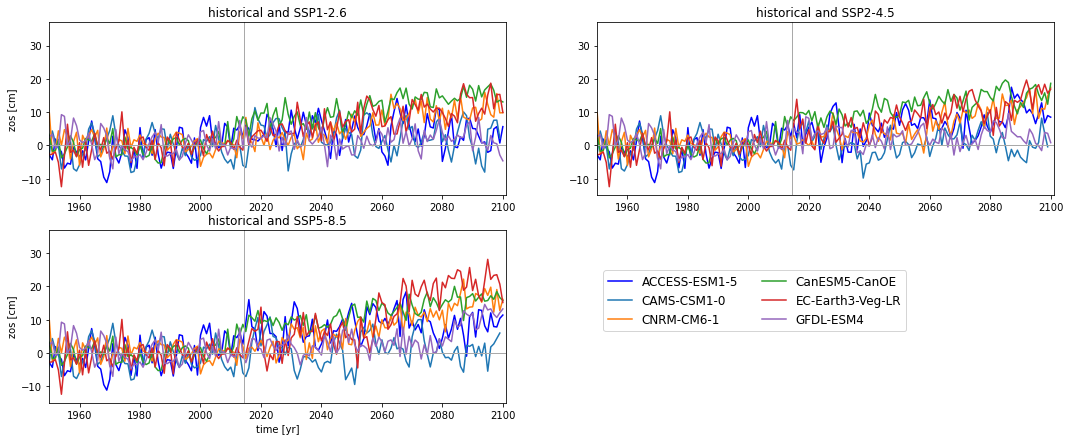

In [365]:
scenarios_zos = [zos_126, zos_245, zos_585]

fig.plot_zos_per_scenario(scenarios_zos, sce_labels, sce_names, hist_start = 1950)

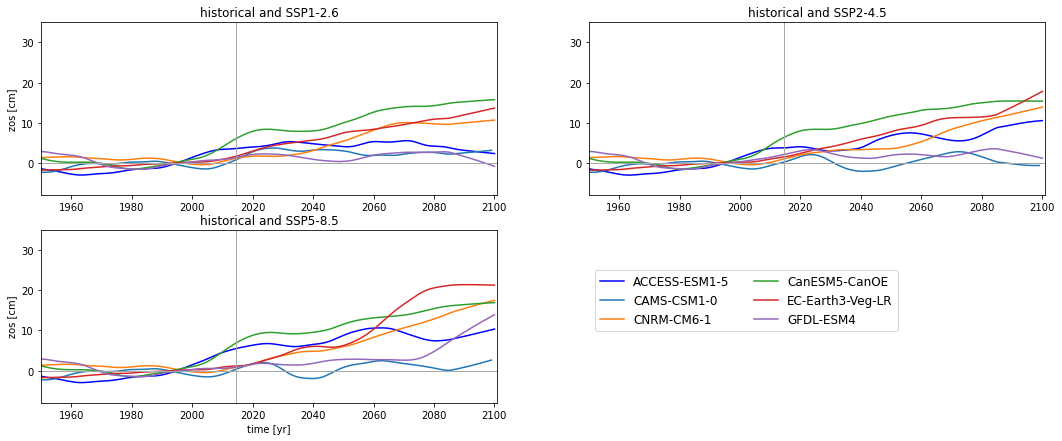

In [366]:
fig.plot_zos_per_scenario(scenarios_zos, sce_labels, sce_names, hist_start = 1950, smoothed = True)

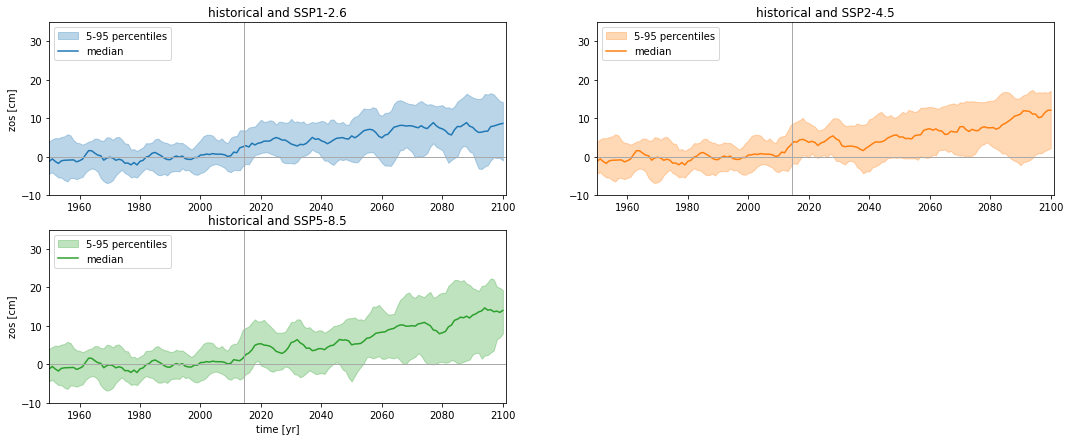

In [367]:
fig.plot_zos_med_percentiles_per_scenarios(scenarios_zos, sce_labels, sce_names, ra=5, hist_start = 1950)

In [368]:
zos_126

model  ACCESS-ESM1-5  CAMS-CSM1-0  CNRM-CM6-1  CanESM5-CanOE  \
time                                                           
1850        5.986613     0.267185   -3.815722       4.632044   
1851        6.086028     5.869863    1.811446       3.022581   
1852       -0.102335     3.391782   -2.103830      -2.116066   
1853        1.812496     2.779541    4.704309       3.581403   
1854        4.781175     0.967230    3.665958       5.476545   
...              ...          ...         ...            ...   
2096       -1.585601     5.160913    9.232032      18.469366   
2097        4.908060     7.547579    8.456033      16.539444   
2098        5.627211     7.578083   15.571465      12.998784   
2099        0.696236     2.210617    9.769927      13.551006   
2100        5.626997          NaN    9.805418      13.046017   

model  EC-Earth3-Veg-LR  GFDL-ESM4  
time                                
1850           7.511057   8.745632  
1851           0.614784   3.889588  
1852           1.109318  10.137466  
1853           4.881832   5.651968  
1854           3.054715   2.325023  
...                 ...        ...  
2096          18.705052   2.981666  
2097          10.995945   0.768893  
2098          15.246086   0.476357  
2099          15.312007  -2.910681  
2100           9.905632  -4.651629  

[251 rows x 6 columns]

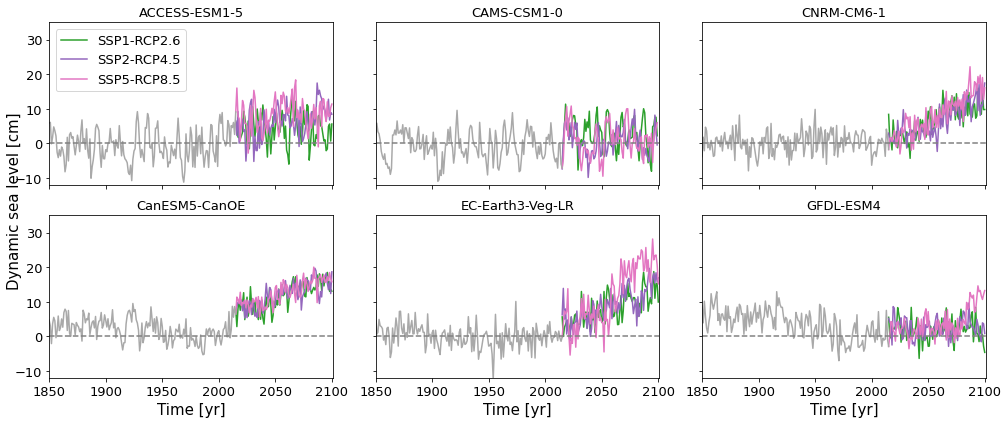

In [369]:
scenarios_zos = [zos_126, zos_245, zos_585]

fig.plot_zos_per_model_all_scenarios(scenarios_zos, ymin = -12, ymax = 35, begin = 1850, end = 2100)

## NearestPoint wind regression model

MSL = constant + coef_u2 x u2 + coef_v2 x v2


What do we need to obtain projections?
- cmip6 data for scenario
- regression results over historical period (from the regression of sea level averaged over all stations)
- whether these regression results are significant

In [370]:
model_np = 'NearestPoint'

#### Import wind data

In [371]:
# Open data file
wind_126_np = imprt.import_cmip6_wind_data(data_type = 'ssp126', use_models = use_models)
wind_245_np = imprt.import_cmip6_wind_data(data_type = 'ssp245', use_models = use_models)
wind_585_np = imprt.import_cmip6_wind_data(data_type = 'ssp585', use_models = use_models)

#### Plot wind data

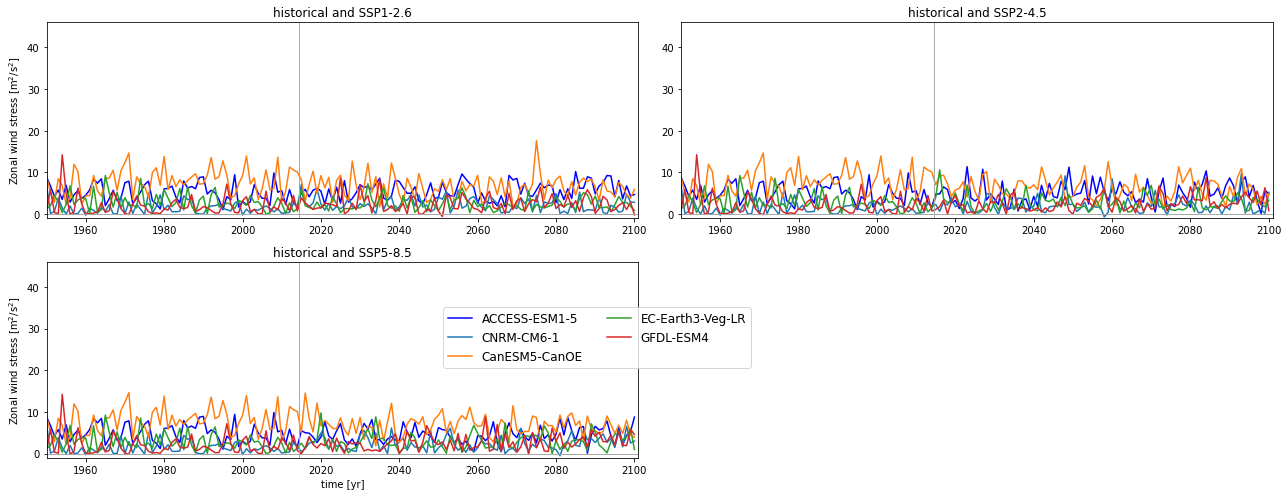

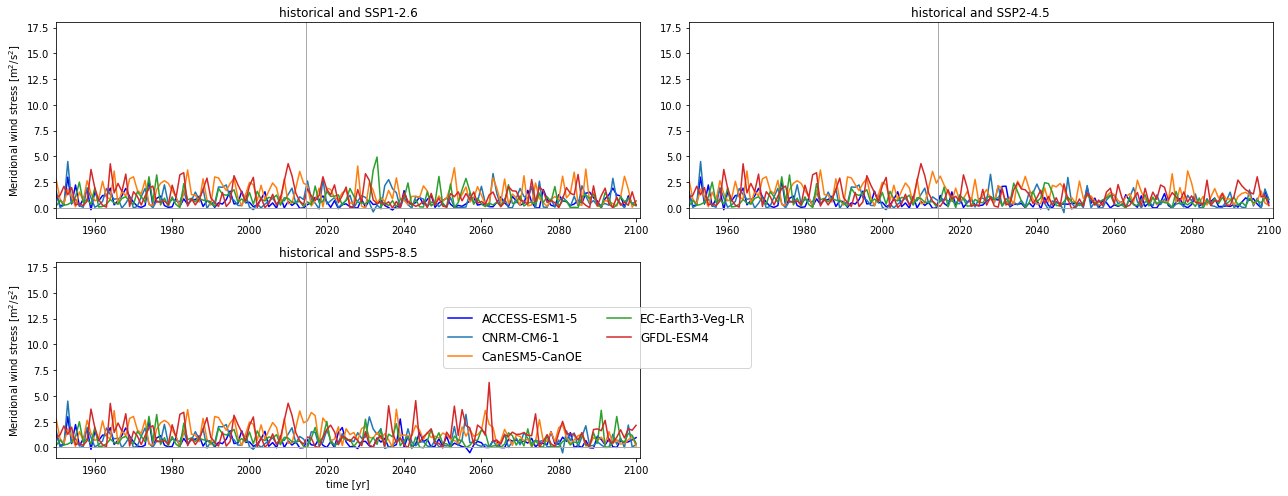

In [372]:
wind_scenarios_np = [wind_126_np, wind_245_np, wind_585_np]

fig.plot_wind_per_scenario(wind_scenarios_np, sce_labels, sce_names, hist_start = 1950)

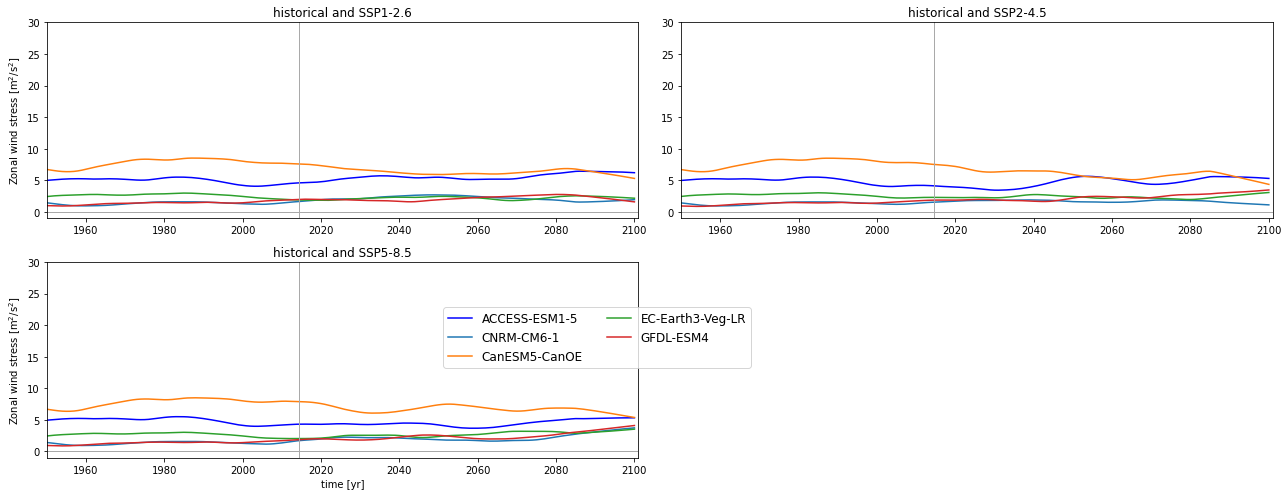

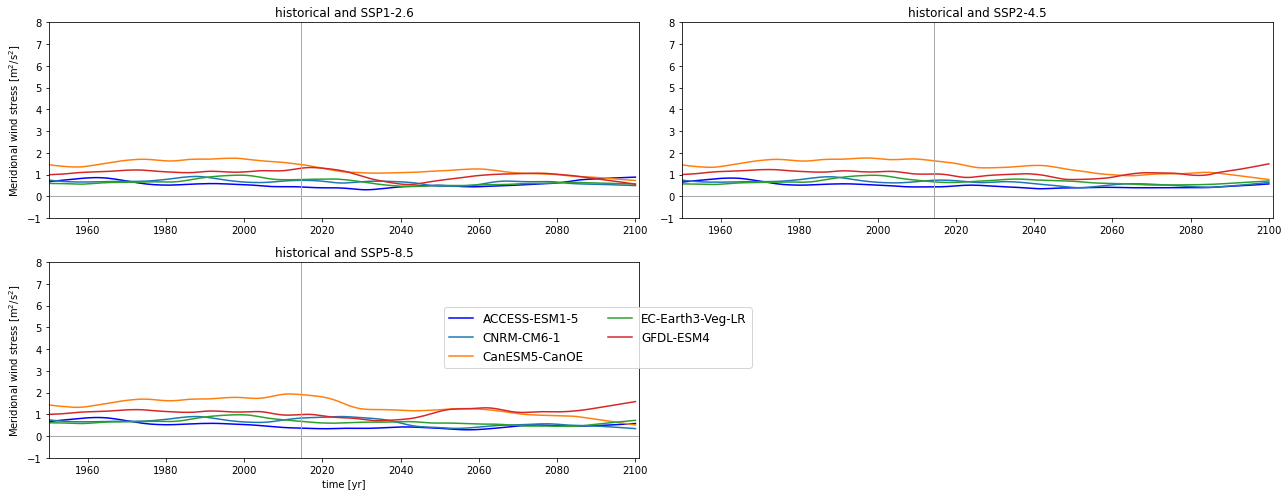

In [373]:
fig.plot_wind_per_scenario(wind_scenarios_np, sce_labels, sce_names, hist_start = 1950, smoothed = True)

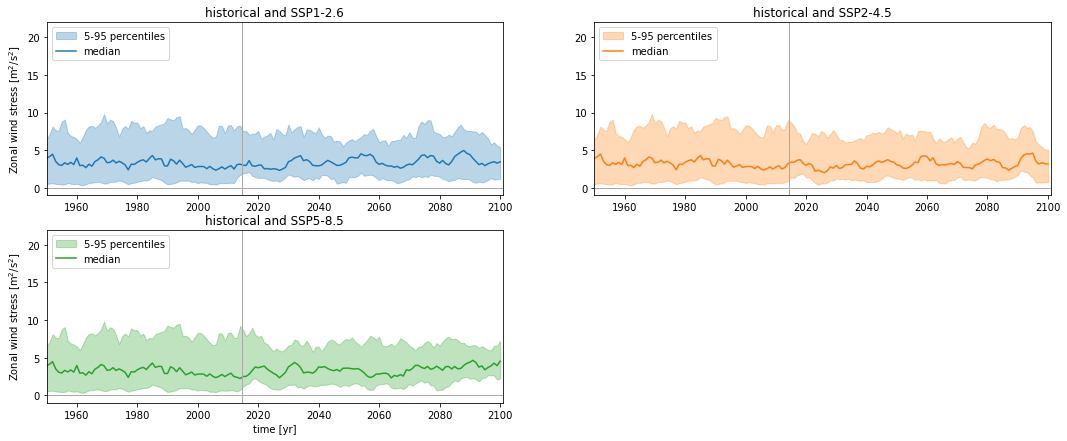

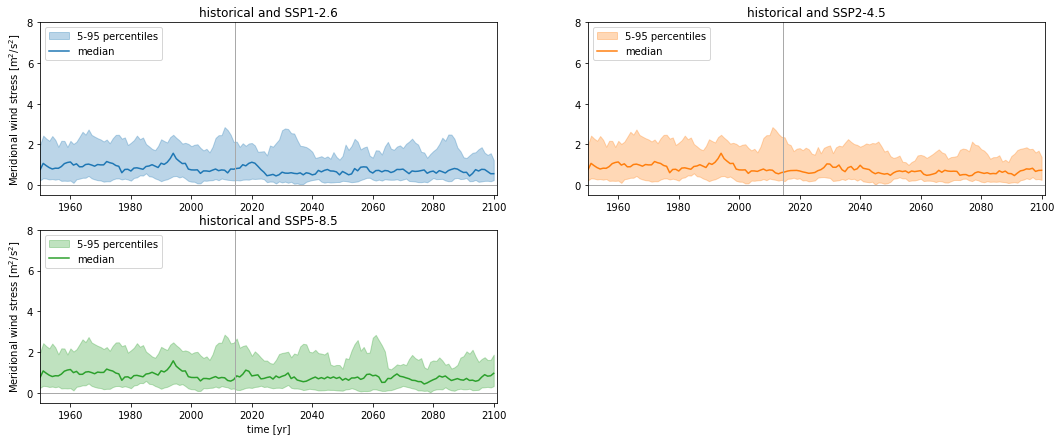

In [374]:
fig.plot_wind_med_percentiles_per_scenario(wind_scenarios_np, sce_labels, sce_names, ra=5, hist_start = 1950)

#### Obtain projections

In [375]:
proj_126_np, results_np = proj.wind_contr_proj(wind_126_np)
proj_245_np, results_np = proj.wind_contr_proj(wind_245_np)
proj_585_np, results_np = proj.wind_contr_proj(wind_585_np)

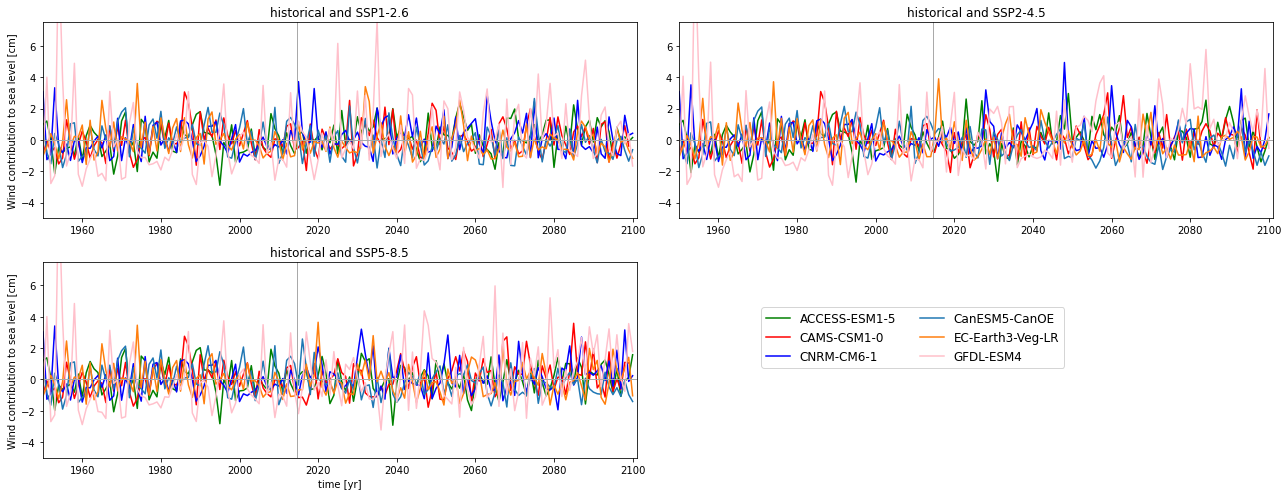

In [376]:
scenarios_np = [proj_126_np, proj_245_np, proj_585_np]

fig.plot_projections_per_scenario(scenarios_np, sce_labels, sce_names, hist_start = 1950)

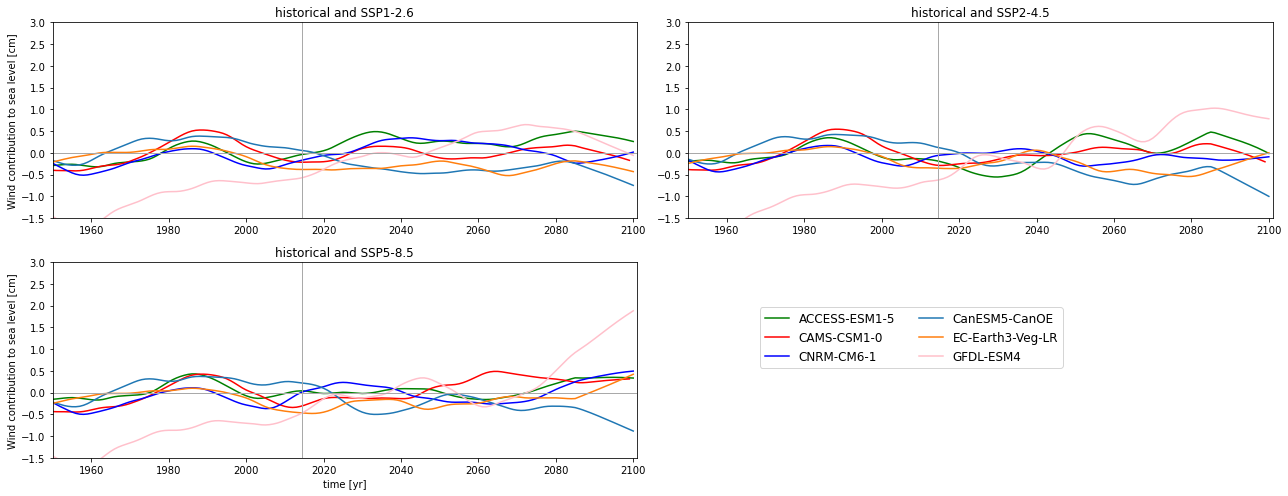

In [377]:
fig.plot_projections_per_scenario(scenarios_np, sce_labels, sce_names, hist_start = 1950, smoothed = True)

Not much difference between the scenarios.

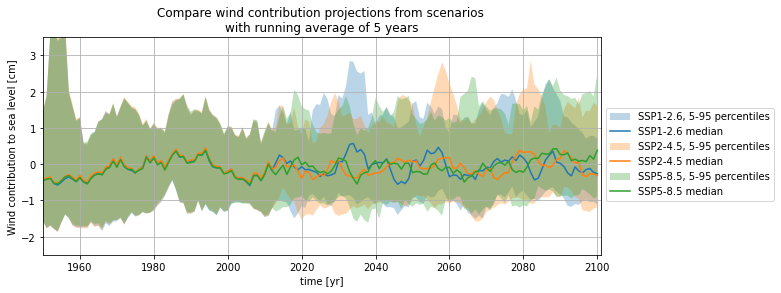

In [378]:
fig.plot_med_percentiles_scenarios(scenarios_np, sce_labels, sce_names, ra=5, hist_start = 1950)

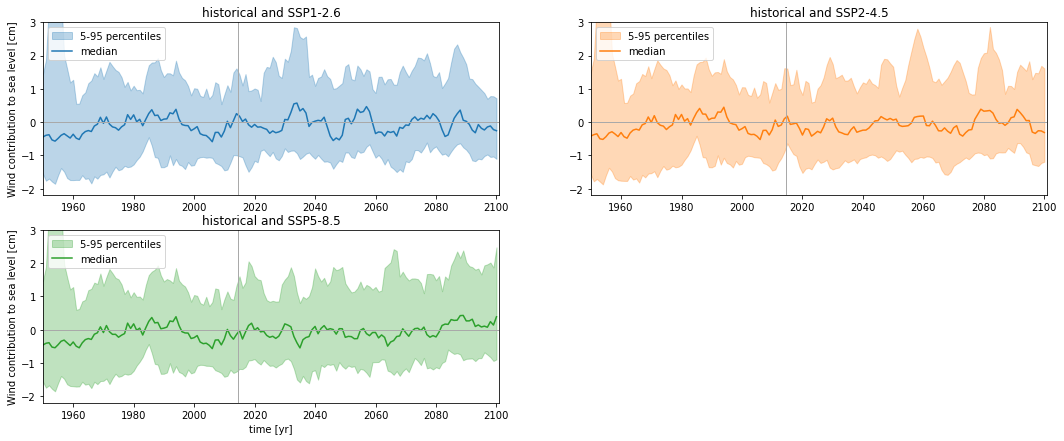

In [379]:
fig.plot_med_percentiles_per_scenarios(scenarios_np, sce_labels, sce_names, ra=5, hist_start = 1950)

## Timmerman wind regression model

MSL       =    

            constant

         + (coef_u2 x u2 + coef_v2 x v2)_channel + (coef_u2 x u2 + coef_v2 x v2)_south

         + (coef_u2 x u2 + coef_v2 x v2)_midwest + (coef_u2 x u2 + coef_v2 x v2)_mideast
         
         + (coef_u2 x u2 + coef_v2 x v2)_northwest + (coef_u2 x u2 + coef_v2 x v2)_northeast



In [380]:
model_tim = 'Timmerman'

#### Import wind data

In [381]:
# Open data file
wind_126_tim = imprt.import_cmip6_wind_data(model = model_tim, data_type = 'ssp126')
wind_245_tim = imprt.import_cmip6_wind_data(model = model_tim, data_type = 'ssp245')
wind_585_tim = imprt.import_cmip6_wind_data(model = model_tim, data_type = 'ssp585')


#### Plot wind data

The wind is plotted per model as an average over the Timmerman regions

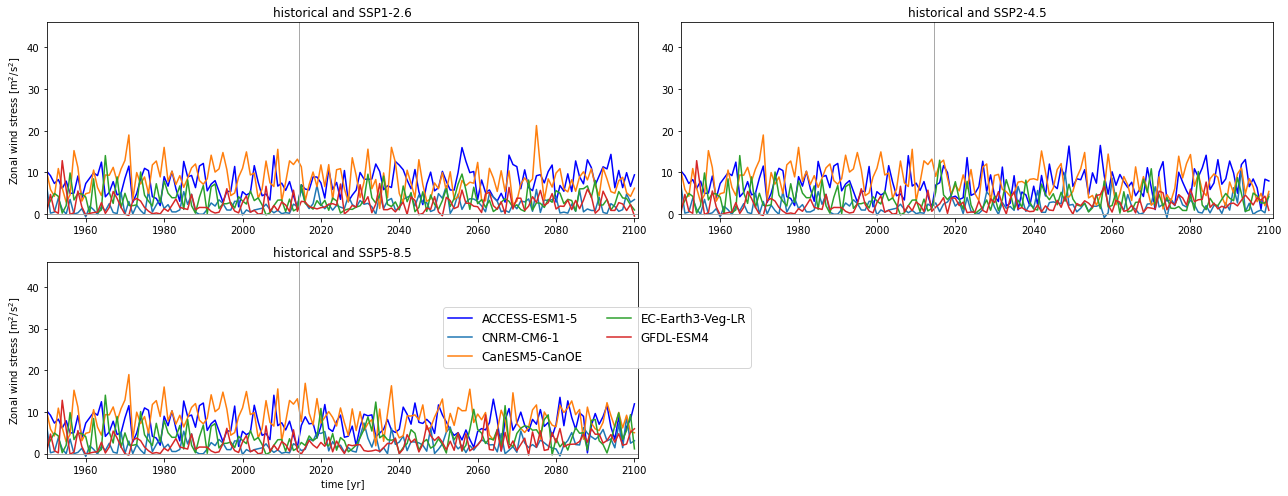

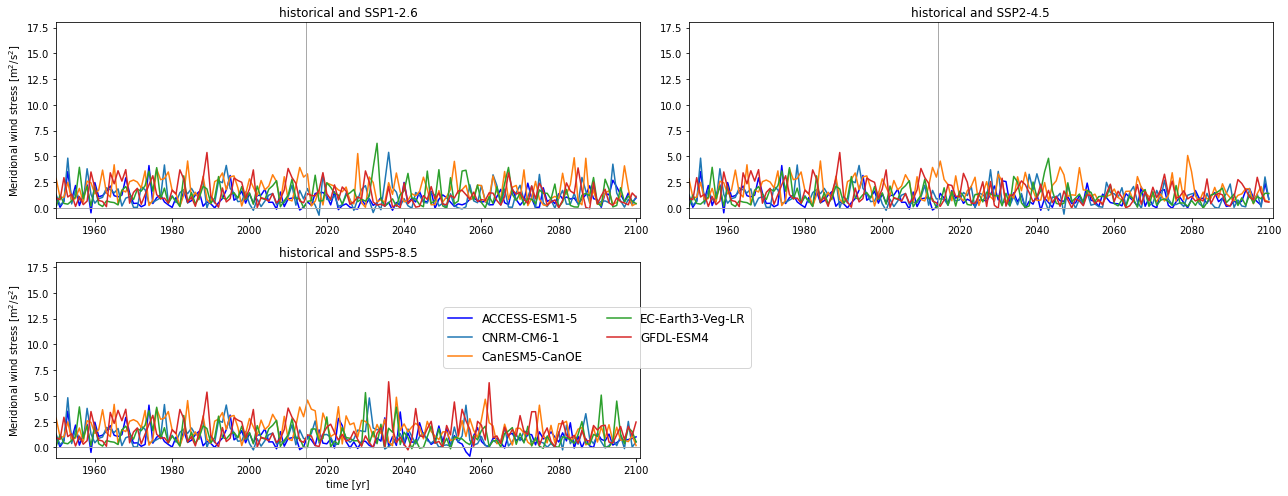

In [382]:
wind_scenarios_tim = [wind_126_tim, wind_245_tim, wind_585_tim]

fig.plot_wind_per_scenario(wind_scenarios_tim, sce_labels, sce_names, hist_start = 1950, wind_model = model_tim)

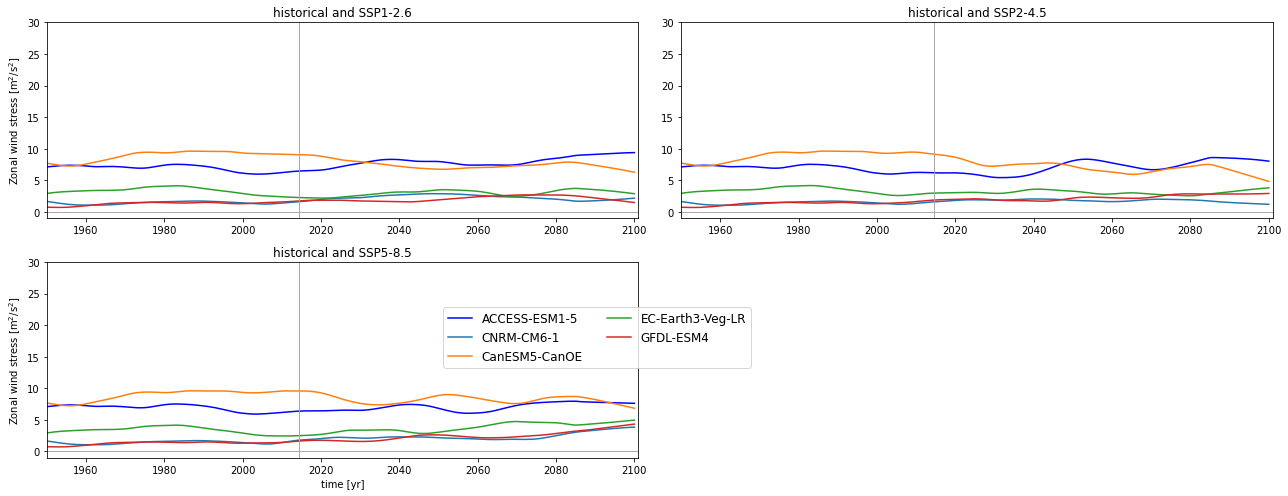

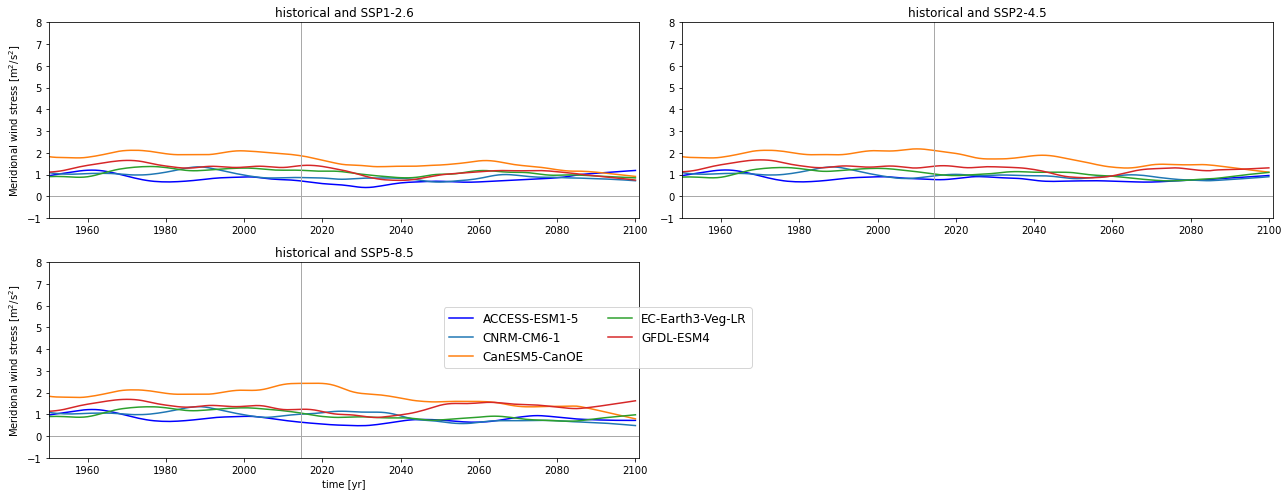

In [383]:
fig.plot_wind_per_scenario(wind_scenarios_tim, sce_labels, sce_names, hist_start = 1950, smoothed = True, wind_model = model_tim)

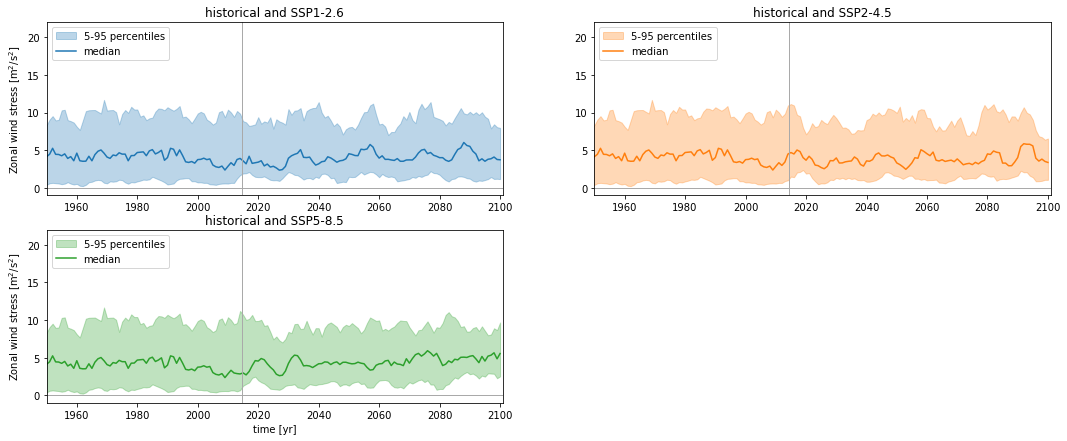

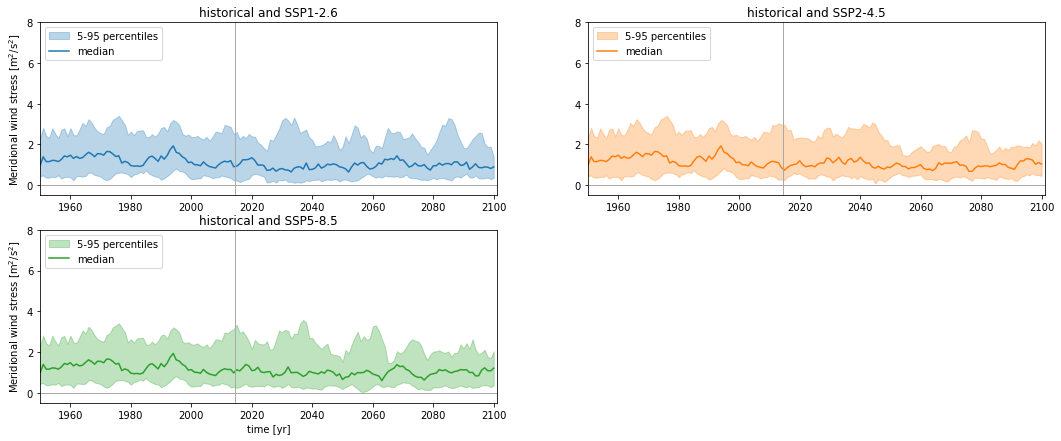

In [384]:
fig.plot_wind_med_percentiles_per_scenario(wind_scenarios_tim, sce_labels, sce_names, ra=5, hist_start = 1950, wind_model = model_tim)

In [385]:
proj_126_tim, results_tim = proj.wind_contr_proj(wind_126_tim, wind_model = model_tim)
proj_245_tim, results_tim = proj.wind_contr_proj(wind_245_tim, wind_model = model_tim)
proj_585_tim, results_tim = proj.wind_contr_proj(wind_585_tim, wind_model = model_tim)

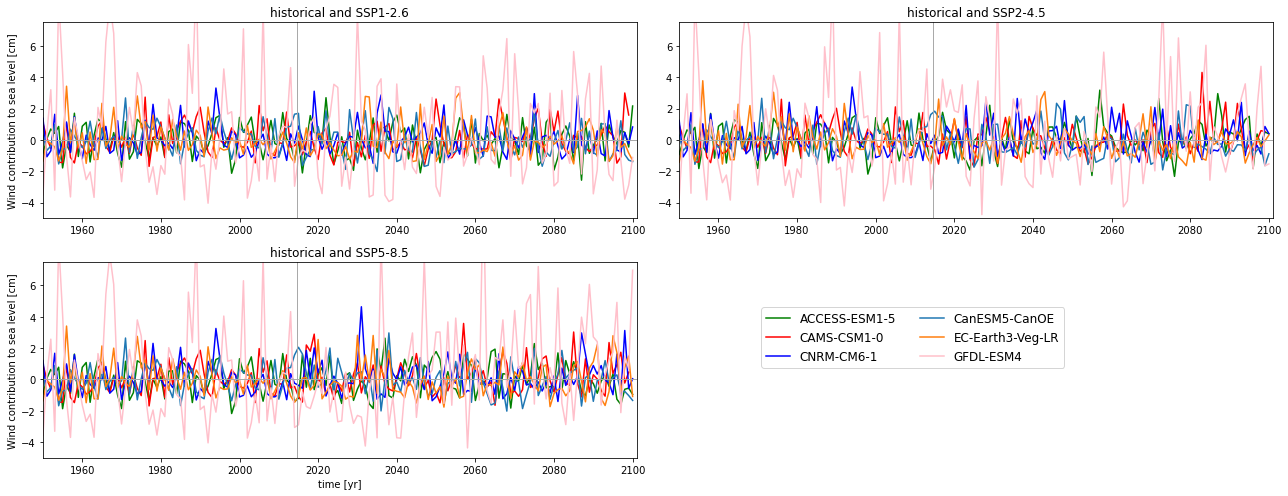

In [386]:
scenarios_tim = [proj_126_tim, proj_245_tim, proj_585_tim]

fig.plot_projections_per_scenario(scenarios_tim, sce_labels, sce_names, hist_start = 1950, wind_model = model_tim)

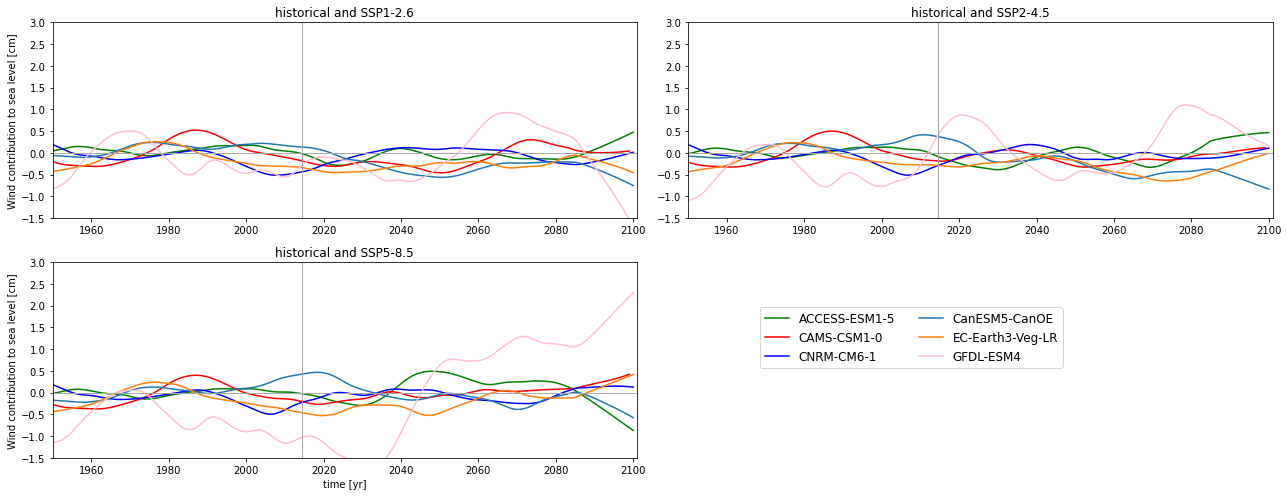

In [387]:
fig.plot_projections_per_scenario(scenarios_tim, sce_labels, sce_names, hist_start = 1950, smoothed = True, wind_model = model_tim)

Especially the non-smoothed projections are very different from the NearestPoint wind model

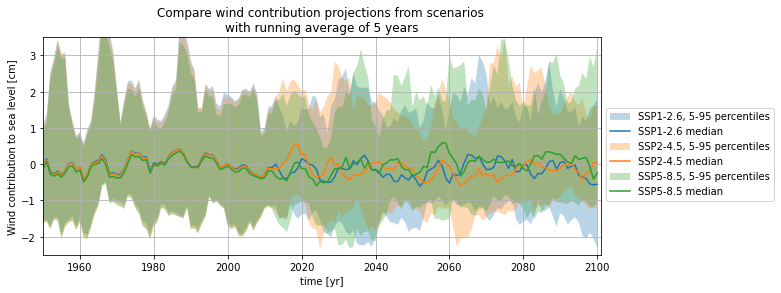

In [388]:
fig.plot_med_percentiles_scenarios(scenarios_tim, sce_labels, sce_names, hist_start = 1950, wind_model = model_tim)

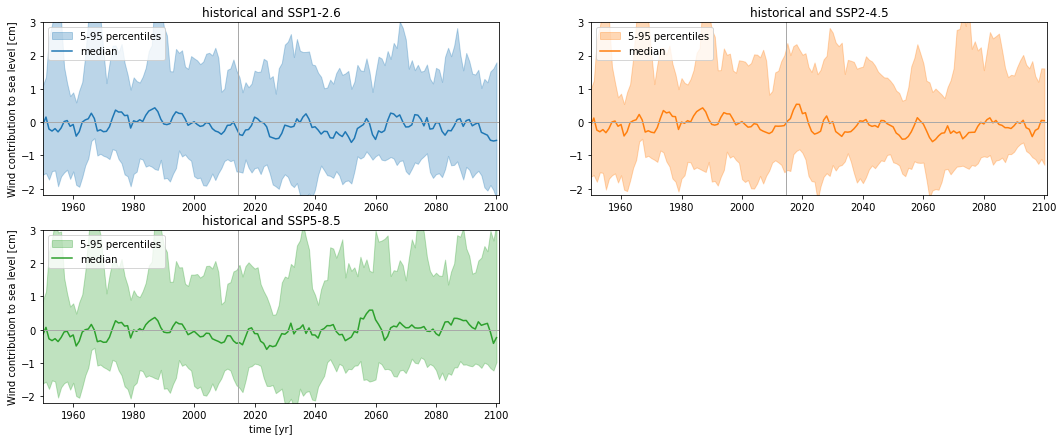

In [389]:
fig.plot_med_percentiles_per_scenarios(scenarios_tim, sce_labels, sce_names, hist_start = 1950, ra=5, wind_model = model_tim)

## Dangendorf wind regression model

MSL = constant + coef_neg x negative corr. region + coef_pos x positive corr. region



In [390]:
model_da = 'Dangendorf'

#### Import pressure data

In [391]:
# Open data file
wind_126_da = imprt.import_cmip6_wind_data(model = model_da, data_type = 'ssp126')
wind_245_da = imprt.import_cmip6_wind_data(model = model_da, data_type = 'ssp245')
wind_585_da = imprt.import_cmip6_wind_data(model = model_da, data_type = 'ssp585')

#### Plot pressure data

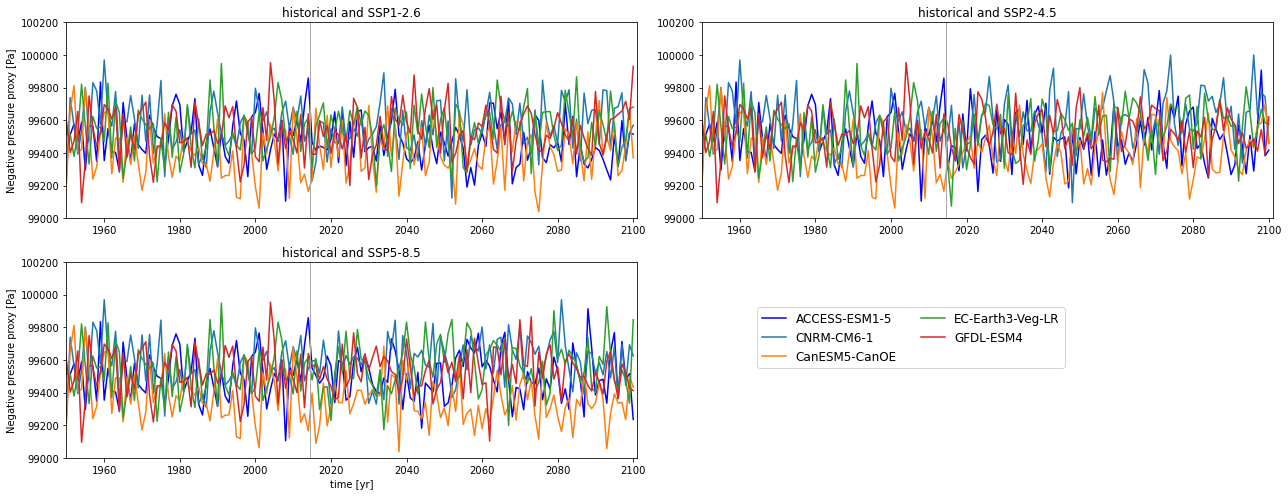

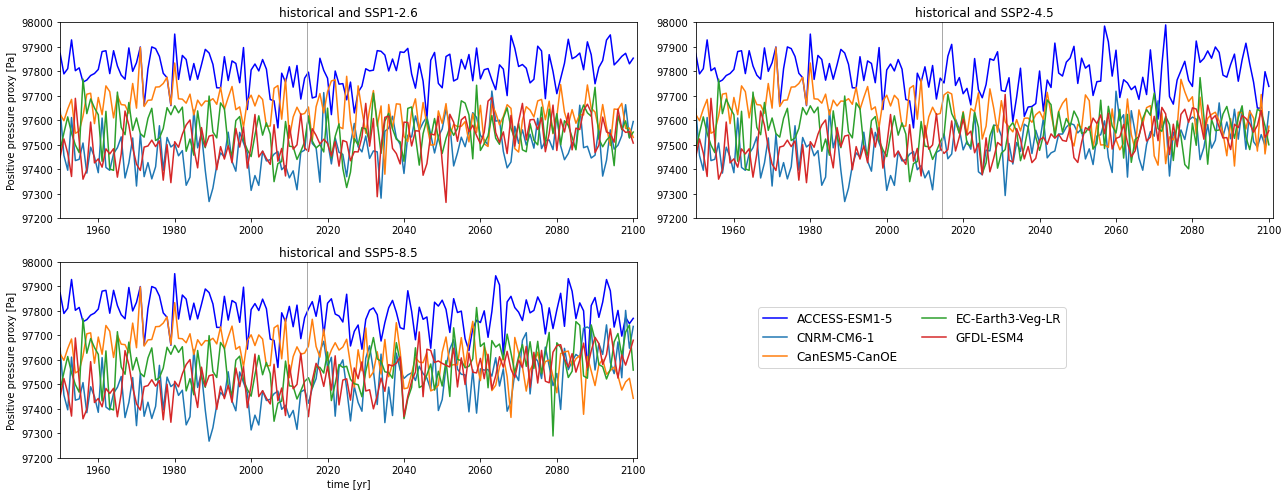

In [392]:
wind_scenarios_da = [wind_126_da, wind_245_da, wind_585_da]

fig.plot_wind_per_scenario(wind_scenarios_da, sce_labels, sce_names, hist_start = 1950, wind_model = model_da)

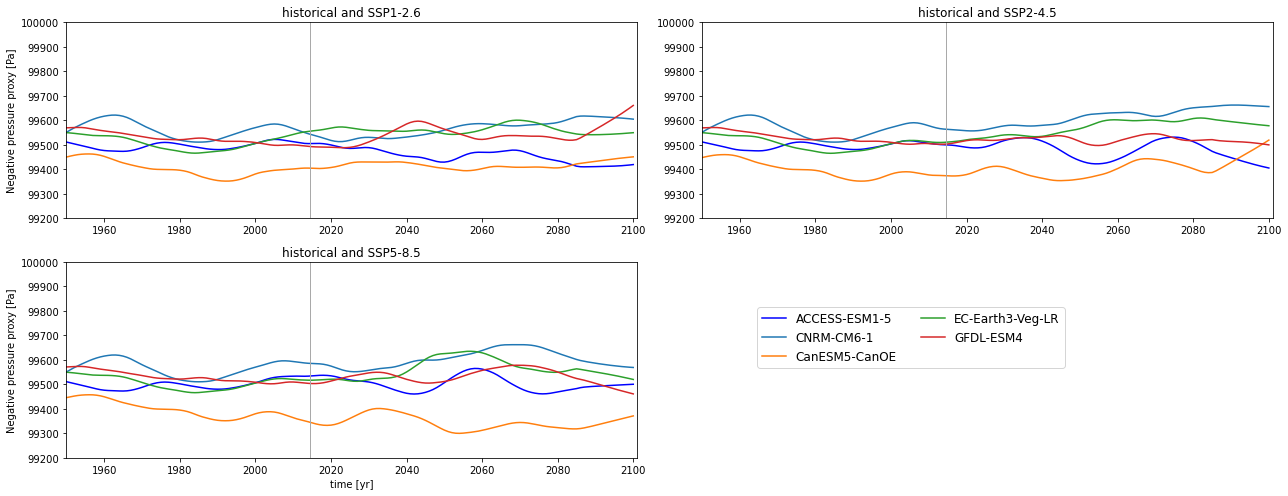

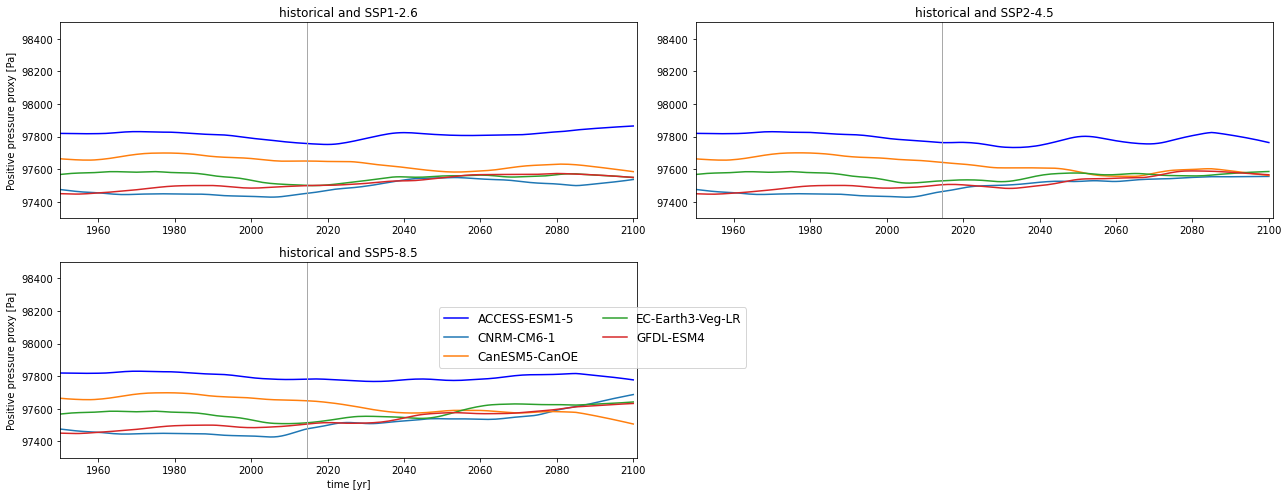

In [393]:
fig.plot_wind_per_scenario(wind_scenarios_da, sce_labels, sce_names, hist_start = 1950, smoothed = True, wind_model = model_da)

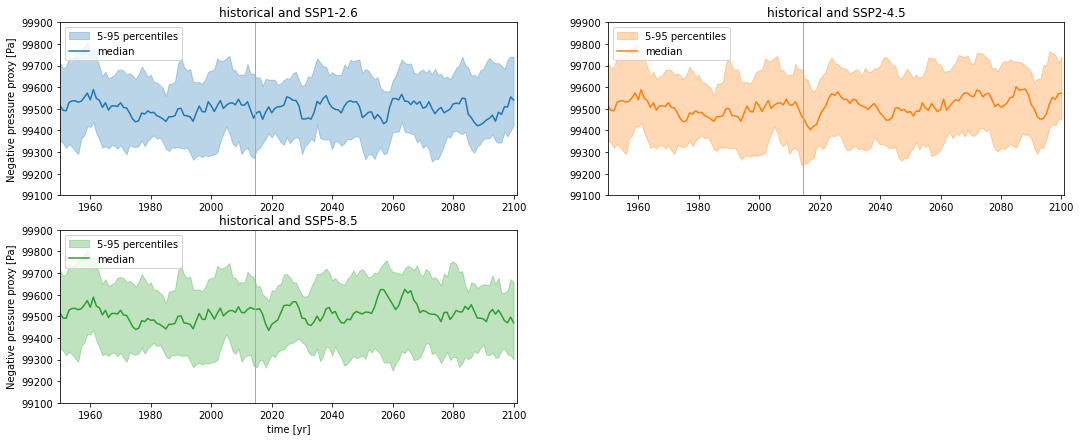

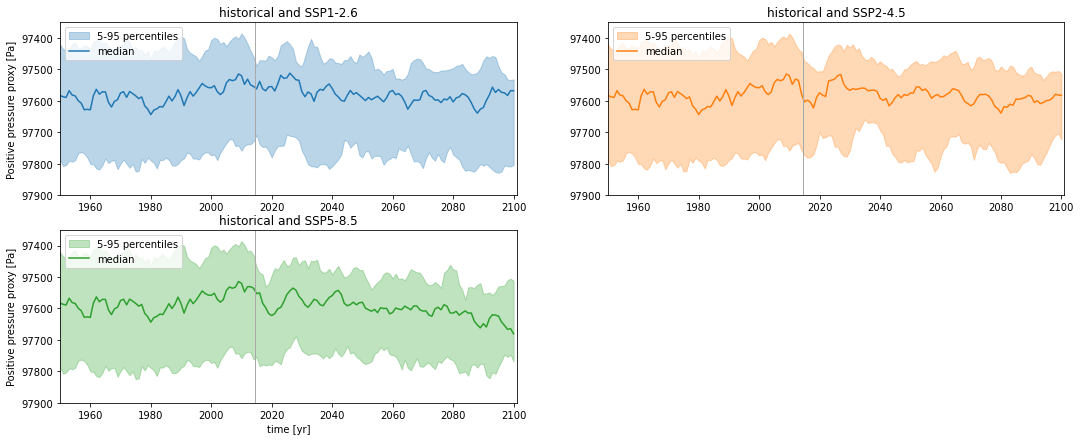

In [394]:
fig.plot_wind_med_percentiles_per_scenario(wind_scenarios_da, sce_labels, sce_names, ra=5, hist_start = 1950, wind_model = model_da)

In [395]:
proj_126_da, results_da = proj.wind_contr_proj(wind_126_da, wind_model = model_da)
proj_245_da, results_da = proj.wind_contr_proj(wind_245_da, wind_model = model_da)
proj_585_da, results_da = proj.wind_contr_proj(wind_585_da, wind_model = model_da)

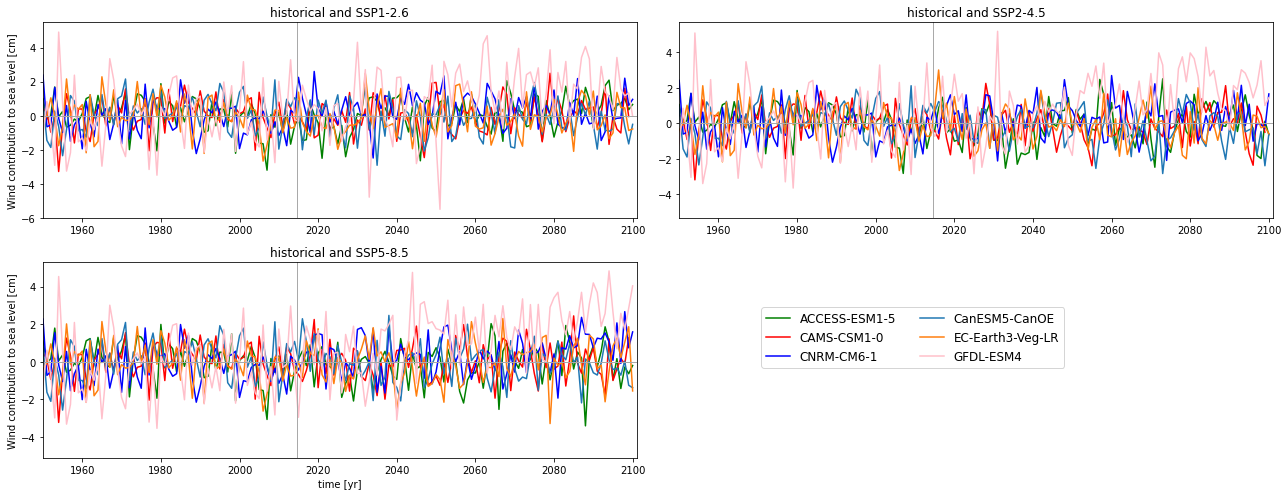

In [396]:
scenarios_da = [proj_126_da, proj_245_da, proj_585_da]

fig.plot_projections_per_scenario(scenarios_da, sce_labels, sce_names, hist_start = 1950, wind_model = model_da)

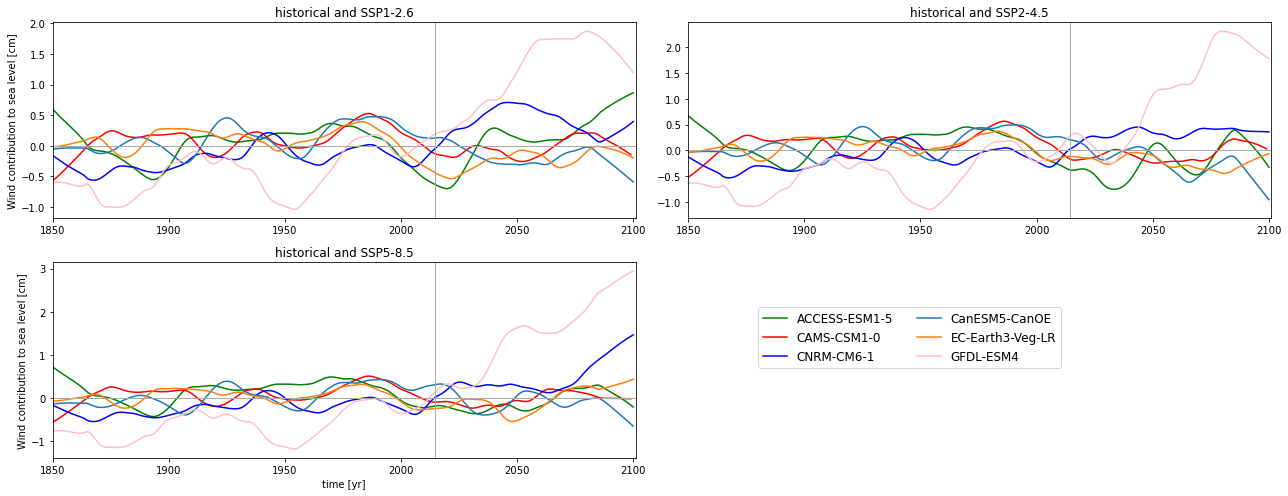

In [397]:
fig.plot_projections_per_scenario(scenarios_da, sce_labels, sce_names, hist_start = 1850, smoothed = True, wind_model = model_da)

Especially the non-smoothed projections are very different from the NearestPoint wind model

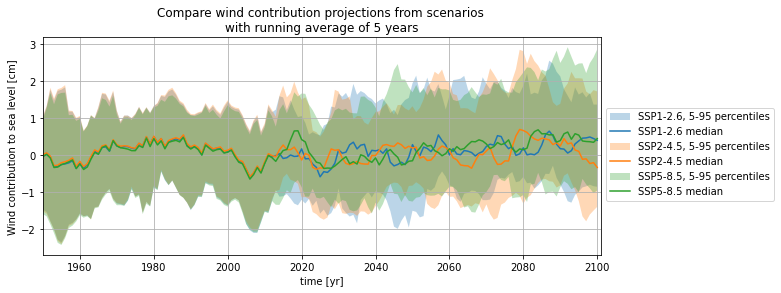

In [398]:
fig.plot_med_percentiles_scenarios(scenarios_da, sce_labels, sce_names, hist_start = 1950, wind_model = model_da)

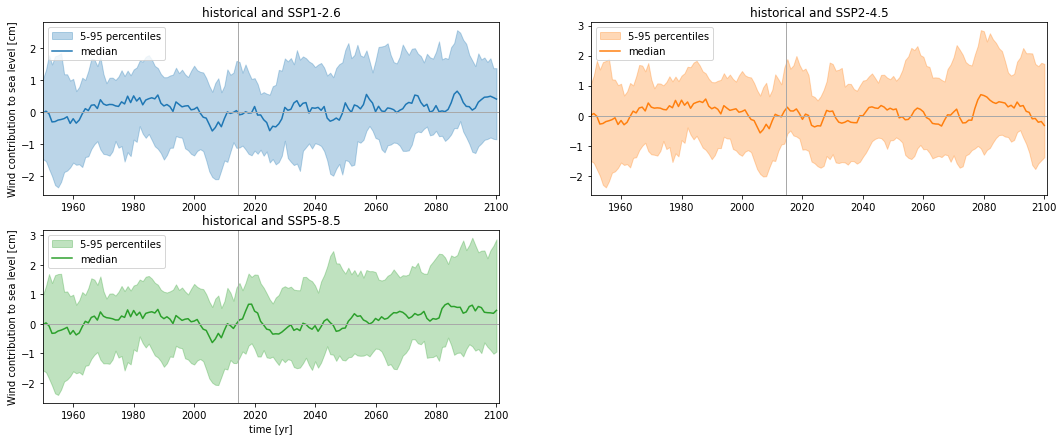

In [399]:
fig.plot_med_percentiles_per_scenarios(scenarios_da, sce_labels, sce_names, hist_start = 1950, ra=5, wind_model = model_da)

## Compare the different wind models

#### Historical and projected wind contribution to mean sea level

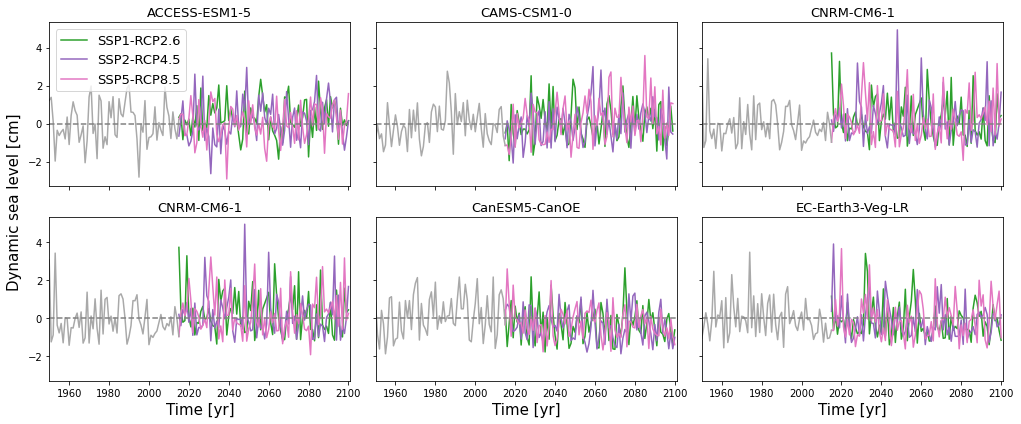

In [465]:
fig.plot_ac_per_model_all_scenarios(scenarios_np, name = 'np')

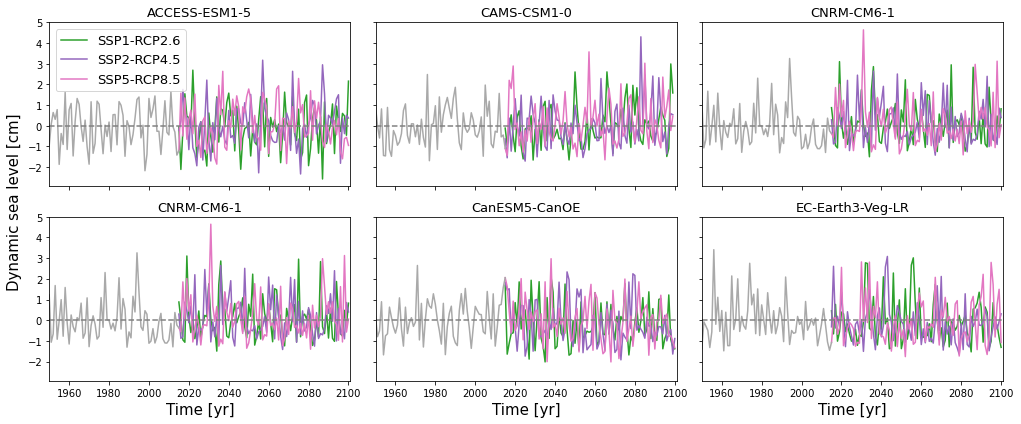

In [466]:
fig.plot_ac_per_model_all_scenarios(scenarios_tim, name = 'tim')

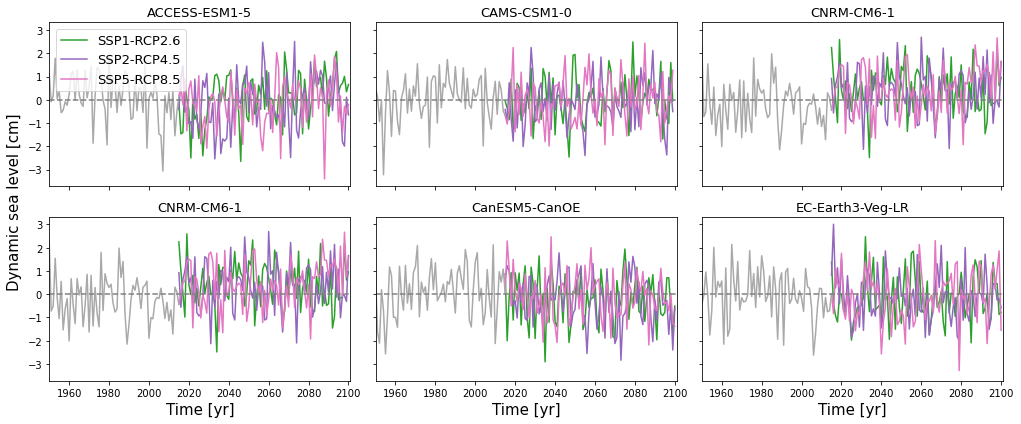

In [467]:
fig.plot_ac_per_model_all_scenarios(scenarios_da, name = 'da', ymin = -4, ymax = 5)

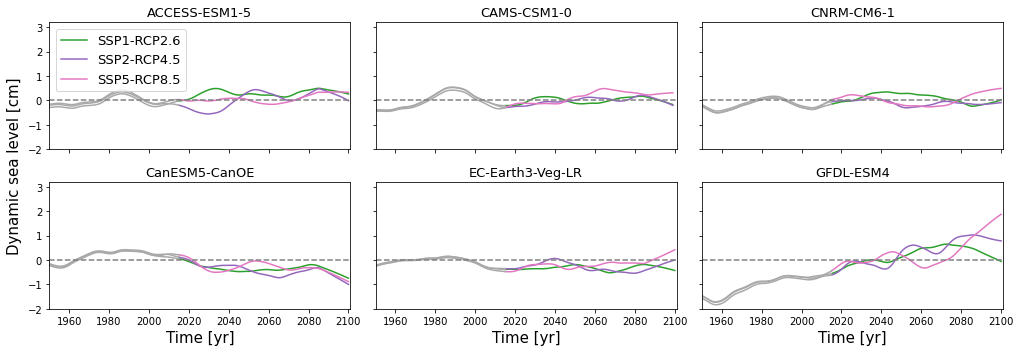

In [491]:
fig.plot_ac_per_model_all_scenarios_smoothed(scenarios_np, name = 'np')

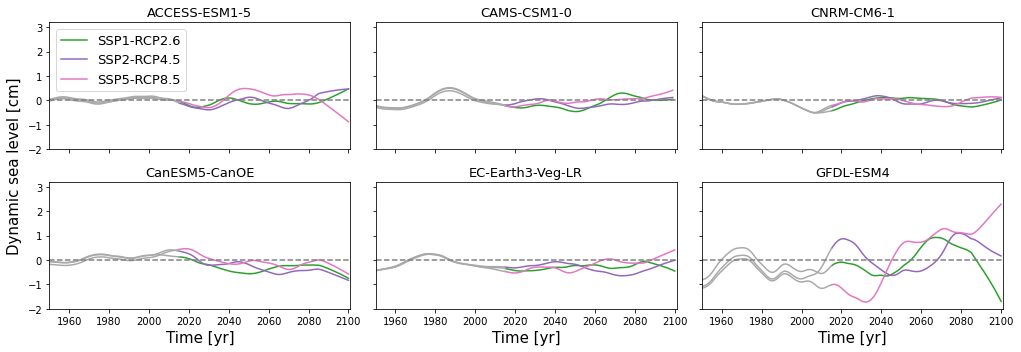

In [492]:
fig.plot_ac_per_model_all_scenarios_smoothed(scenarios_tim, name = 'tim')

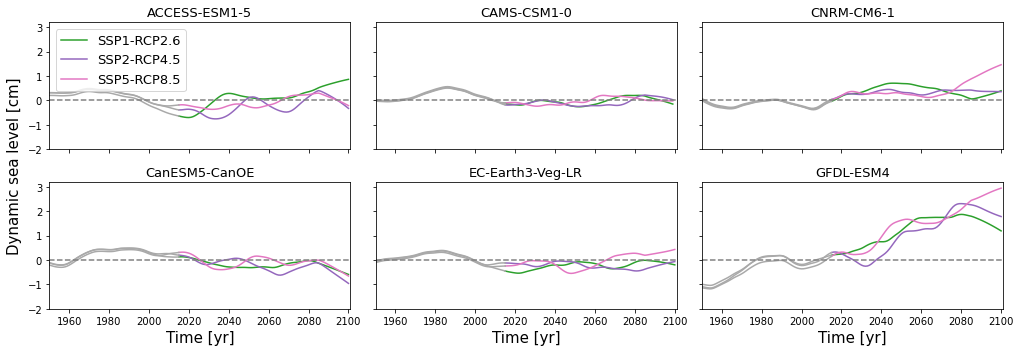

In [493]:
fig.plot_ac_per_model_all_scenarios_smoothed(scenarios_da, name = 'da')

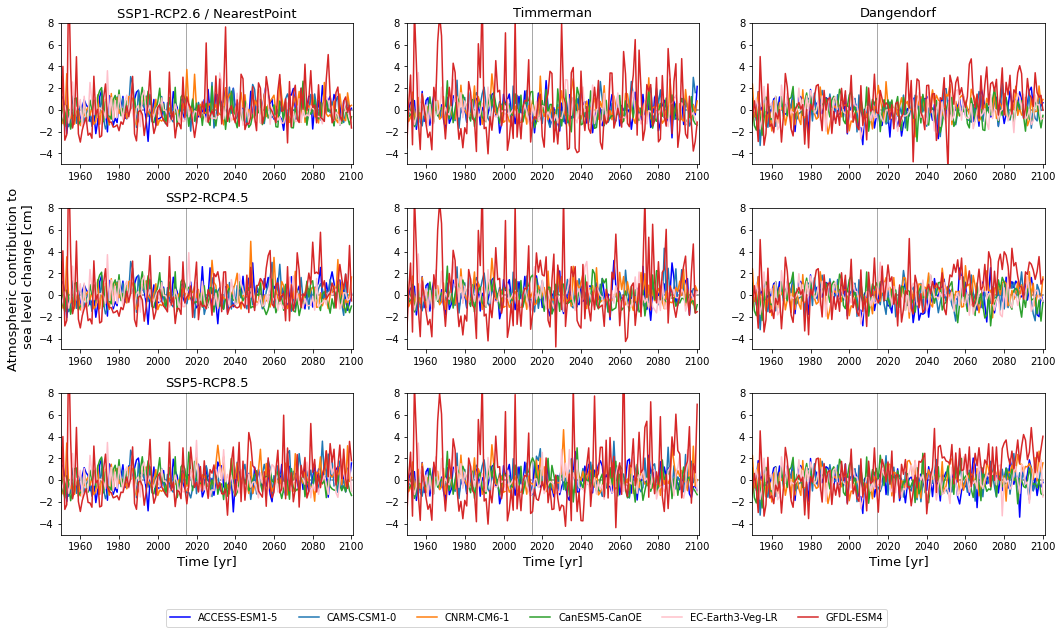

In [406]:
sce_names = ['SSP1-RCP2.6', 'SSP2-RCP4.5', 'SSP5-RCP8.5']
scenarios_comp = [scenarios_np, scenarios_tim, scenarios_da]

fig.plot_projections_per_scenario_all_wind_models(scenarios_comp, sce_labels, sce_names, hist_start = 1950)

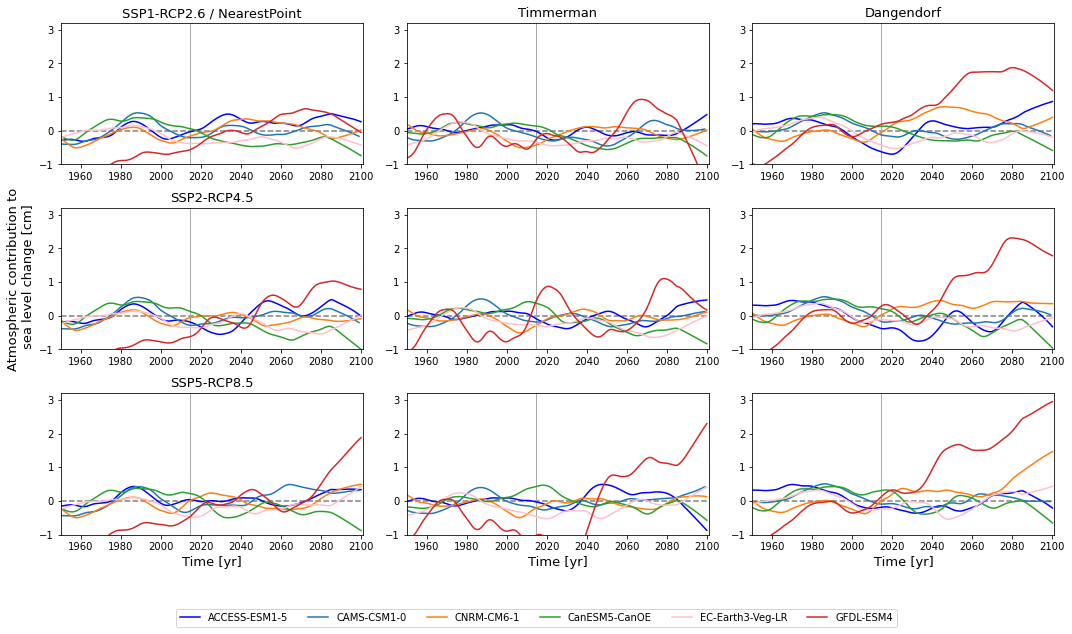

In [407]:
fig.plot_projections_per_scenario_all_wind_models(scenarios_comp, sce_labels, sce_names, hist_start = 1950, smoothed = True)

In [408]:
scenarios_comp[0]

[      ACCESS-ESM1-5  CAMS-CSM1-0  CNRM-CM6-1  CanESM5-CanOE  EC-Earth3-Veg-LR  \
 time                                                                            
 1850       1.704176    -1.267704   -1.328353       0.011837          2.121945   
 1851       1.135847     0.514560   -0.208041       0.297375          0.135229   
 1852       1.061618    -0.628276   -1.128365      -0.911416         -0.354371   
 1853       1.728807    -0.069037    0.330973      -0.602857          0.433362   
 1854       0.311869    -0.841697    0.822731      -0.337788          0.663195   
 ...             ...          ...         ...            ...               ...   
 2096       0.810042    -1.166118   -0.875839      -0.059939          0.700190   
 2097      -0.102803    -0.297631   -1.000713       0.231370         -0.149177   
 2098       0.195148     0.905354    1.568497      -0.668673          0.000479   
 2099      -0.103085    -0.392632    0.289134      -1.361334         -0.661834   
 2100       0.15

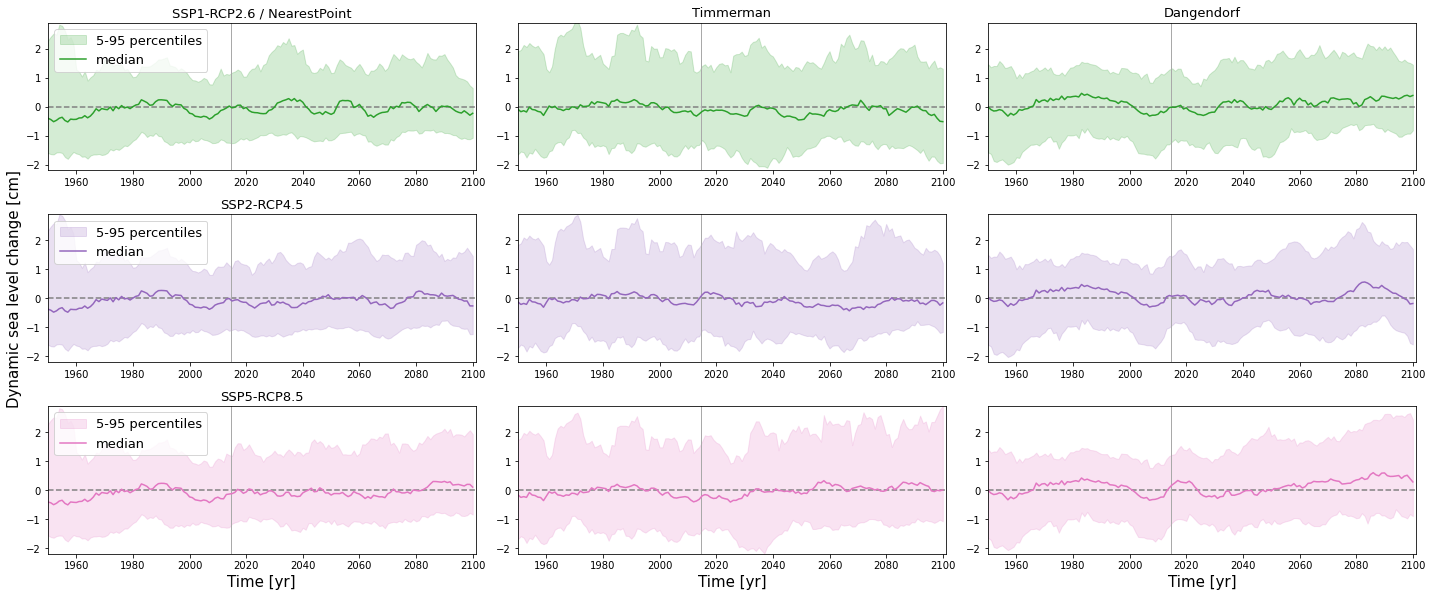

In [475]:
fig.plot_med_percentiles_per_scenarios_all_wind_models(scenarios_comp, sce_labels, sce_names, hist_start = 1950, ra=10)

#### Obtain trends over the projected period

In [476]:
sce_names = ['SSP1-RCP2.6', 'SSP2-RCP4.5', 'SSP5-RCP8.5']

In [494]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

def get_trend_df(data):
    trend_df = pd.DataFrame({'quantity': ['linear trend', 'std', 'percentage', 'p-value']})
    trend_df = trend_df.set_index('quantity')
    
    for model in data.columns:
        trend_df[model] = ''
    


    for column in trend_df:
        trend = linregress(data.loc[2000:2099].index.values,data.loc[2000:2099][column].values).slope * 10
        trend_df[column]['linear trend'] = trend
        trend_df[column]['std'] = linregress(data.loc[2000:2099].index.values,data.loc[2000:2099][column].values).stderr * 10
        trend_df[column]['percentage'] = trend*50
        trend_df[column]['p-value'] = linregress(data.loc[2000:2099].index.values,data.loc[2000:2099][column].values).pvalue
    return trend_df

In [495]:
trend_df_np_126 = get_trend_df(scenarios_np[0])
trend_df_np_245 = get_trend_df(scenarios_np[1])
trend_df_np_585 = get_trend_df(scenarios_np[2])

trend_df_tim_126 = get_trend_df(scenarios_tim[0])
trend_df_tim_245 = get_trend_df(scenarios_tim[1])
trend_df_tim_585 = get_trend_df(scenarios_tim[2])

trend_df_da_126 = get_trend_df(scenarios_da[0])
trend_df_da_245 = get_trend_df(scenarios_da[1])
trend_df_da_585 = get_trend_df(scenarios_da[2])

In [502]:
trend_df_tim_126

ACCESS-ESM1-5 CAMS-CSM1-0 CNRM-CM6-1 CanESM5-CanOE  \
quantity                                                          
linear trend     -0.029607    0.051457   0.042201     -0.052305   
std               0.036132    0.034237   0.034349      0.035275   
percentage       -1.480358    2.572831   2.110057     -2.615261   
p-value           0.414538    0.136064   0.222166      0.141341   

             EC-Earth3-Veg-LR GFDL-ESM4  
quantity                                 
linear trend         0.014997  0.017684  
std                   0.03542  0.102621  
percentage           0.749869   0.88419  
p-value              0.672917   0.86354

In [508]:
trend_df_da_245

ACCESS-ESM1-5 CAMS-CSM1-0 CNRM-CM6-1 CanESM5-CanOE  \
quantity                                                          
linear trend      0.069739    0.005134   0.070227     -0.091034   
std               0.037839    0.033109   0.033985      0.035448   
percentage        3.486938    0.256699   3.511356      -4.55169   
p-value           0.068343    0.877089   0.041426      0.011736   

             EC-Earth3-Veg-LR  GFDL-ESM4  
quantity                                  
linear trend           -0.009   0.269339  
std                  0.035044   0.054327  
percentage          -0.449994  13.466951  
p-value              0.797857   0.000003

In [504]:
trend_df_tim_585

ACCESS-ESM1-5 CAMS-CSM1-0 CNRM-CM6-1 CanESM5-CanOE  \
quantity                                                          
linear trend     -0.020651    0.043969   0.059393     -0.064813   
std               0.035948    0.036806   0.035969      0.034817   
percentage       -1.032567    2.198462   2.969628     -3.240658   
p-value           0.566963    0.235124   0.101891      0.065667   

             EC-Earth3-Veg-LR  GFDL-ESM4  
quantity                                  
linear trend         0.052853   0.299043  
std                  0.036172   0.106014  
percentage           2.642654  14.952145  
p-value              0.147175   0.005799

## Annual trends over 2001 - 2100

Dangendorf found trends between -0.14 and 0.60 mm/y

Text(0, 0.5, 'Linear trend [mm/y]')

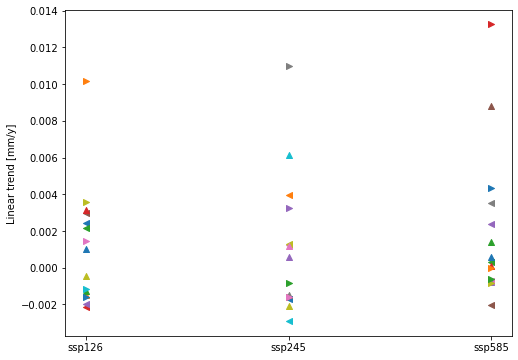

In [416]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

wind_labels = ['NearestPoint', 'Timmerman', 'Dangendorf']
markers = ['<', '^', '>']


plt.figure(figsize=(8,6))

dfs_wmodels = []
for i, scenarios in enumerate(scenarios_comp): # loop over the wind models
    dfs_scenarios = []
    for j, scenario in enumerate(scenarios): # loop over the scenarios
        
        df = pd.DataFrame({'variable':['trend', 'se']})
        df = df.set_index('variable')
        for k, model in enumerate(scenario.columns): # loop over the models
            trend = linregress(scenario.index.values, scenario[model].values).slope
            se = linregress(scenario.index.values, scenario[model].values).stderr
            df[model] = [trend, se]
            
            plt.scatter(sce_labels[j], trend, marker = markers[i])
        dfs_scenarios.append(df)
    dfs_wmodels.append(pd.concat(dfs_scenarios, axis=1, keys = sce_labels))
    
trend_df = pd.concat(dfs_wmodels, axis=1, keys = wind_labels).swaplevel(2,1, axis=1)

plt.ylabel('Linear trend [mm/y]')



In [417]:
def significance_test(p, alpha):
    if p < alpha: return True
    else: return False

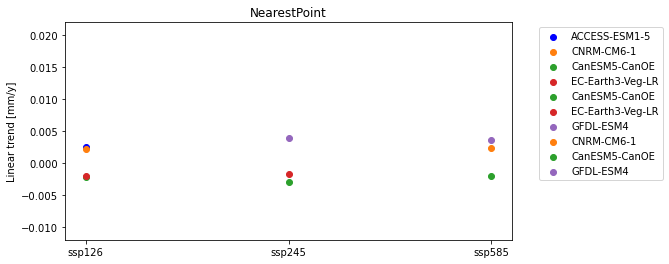

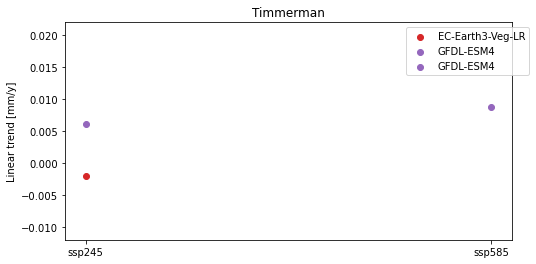

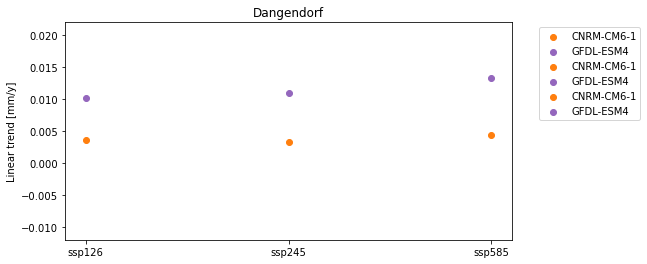

In [418]:
colors = ['b', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
              'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'g', 'k']
models = scenarios_comp[0][2].columns
significance_level = 95

dfs_wmodels = []
for i, scenarios in enumerate(scenarios_comp): # loop over the wind models
    
    plt.figure(figsize=(8,4))
    plt.title(wind_labels[i])
    plt.ylabel('Linear trend [mm/y]')
    dfs_scenarios = []
    for j, scenario in enumerate(scenarios): # loop over the scenarios
        
        df = pd.DataFrame({'variable':['trend', 'se', 'sig']})
        df = df.set_index('variable')
        for k, model in enumerate(models): # loop over the models
            if model in scenario:
                trend = linregress(scenario.index.values, scenario[model].values).slope
                se = linregress(scenario.index.values, scenario[model].values).stderr
                p = linregress(scenario.index.values, scenario[model].values).pvalue
                sig = significance_test(p, 1-significance_level/100)
                df[model] = [trend, se, sig]
                #plt.errorbar(labels[j], trend, yerr=se, fmt="o", label = 'Tide gauge')
                if sig:
                    plt.scatter(sce_labels[j], trend, color = colors[k], label = model)
                
        dfs_scenarios.append(df)
    dfs_wmodels.append(pd.concat(dfs_scenarios, axis=1, keys = sce_labels))
    plt.ylim(-0.012, 0.022)
    plt.legend(bbox_to_anchor=(1.05, 1.0))
    
    
trend_df = pd.concat(dfs_wmodels, axis=1, keys = wind_labels).swaplevel(2,1, axis=1)



Most annual trends are not significant on the 95% significance level and the significant ones are very very small.

### Plot percentile bars

Following: https://github.com/dlebars/CMIP_SeaLevel/blob/master/notebooks/plot_zostoga.ipynb

#### 2001 - 2021

In [419]:
percentiles, median = fig.make_percentile_df(scenarios_comp, sce_labels, sce_names)

In [420]:
percentiles

NearestPoint                                    \
             Percentile: 5   Percentile: 17   Percentile: 50    
scenario                                                        
SSP1-RCP2.6            -0.0             -0.0              0.0   
SSP2-RCP4.5           -0.01             -0.0              0.0   
SSP5-RCP8.5           -0.01             -0.0              0.0   

                                                    Timmerman  \
             Percentile: 83   Percentile: 95   Percentile: 5    
scenario                                                        
SSP1-RCP2.6             0.01             0.01            -0.0   
SSP2-RCP4.5             0.01             0.02           -0.01   
SSP5-RCP8.5             0.01             0.02           -0.01   

                                                                \
             Percentile: 17   Percentile: 50   Percentile: 83    
scenario                                                         
SSP1-RCP2.6             -0.0              0.0              0.0   
SSP2-RCP4.5             -0.0              0.0              0.0   
SSP5-RCP8.5             -0.0              0.0             0.01   

                                  Dangendorf                   \
             Percentile: 95   Percentile: 5   Percentile: 17    
scenario                                                        
SSP1-RCP2.6              0.0            -0.0              0.0   
SSP2-RCP4.5             0.01           -0.01             -0.0   
SSP5-RCP8.5             0.03            -0.0              0.0   

                                                                
             Percentile: 50   Percentile: 83   Percentile: 95   
scenario                                                        
SSP1-RCP2.6              0.0             0.02             0.02  
SSP2-RCP4.5             0.01             0.01             0.02  
SSP5-RCP8.5             0.01             0.02             0.03

In [421]:
median

NearestPoint Timmerman Dangendorf
scenario                                     
SSP1-RCP2.6          0.0       0.0        0.0
SSP2-RCP4.5          0.0       0.0       0.01
SSP5-RCP8.5          0.0       0.0       0.01

In [422]:
scenario = scenarios_comp[0][0]
year_s = 1850
year_e = 1900

df_trend = pd.DataFrame({'variable':['trend']})
df_trend = df_trend.set_index('variable')
for model in scenario:
    df_trend[model] = linregress(scenario[model].loc[year_s:year_e].index,
                                                scenario[model].loc[year_s:year_e].values).slope
                
df_trend.quantile(p/100, axis=1).values[0]

-0.029759926518204607

In [423]:
df_trend

ACCESS-ESM1-5  CAMS-CSM1-0  CNRM-CM6-1  CanESM5-CanOE  \
variable                                                          
trend          -0.02976     0.010281    0.001572       0.002594   

          EC-Earth3-Veg-LR  GFDL-ESM4  
variable                               
trend             -0.00006   0.006865

In [424]:
year_s = 2000
year_e = 2100

linregress(scenario[model].loc[year_s:year_e].index,
                                                scenario[model].loc[year_s:year_e].values).slope

0.008371350544520404

In [425]:
median['NearestPoint'].index

Index(['SSP1-RCP2.6', 'SSP2-RCP4.5', 'SSP5-RCP8.5'], dtype='object', name='scenario')

In [426]:
median['NearestPoint'].values

array([0.0, 0.0, 0.0], dtype=object)

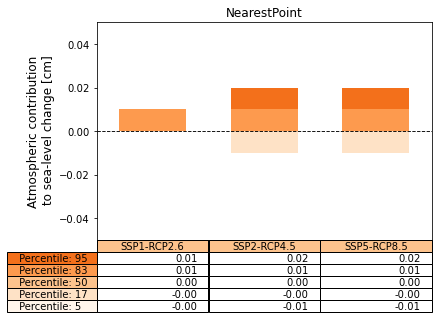

In [427]:
fig.summary_fig_and_table(percentiles['NearestPoint'].T, wind_model = 'NearestPoint')

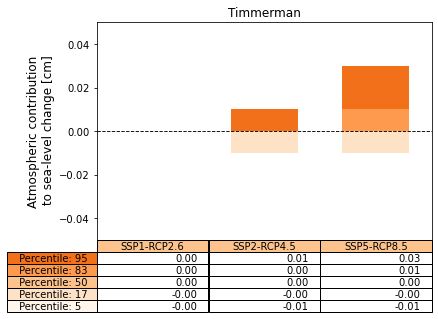

In [428]:
fig.summary_fig_and_table(percentiles['Timmerman'].T, wind_model = 'Timmerman')

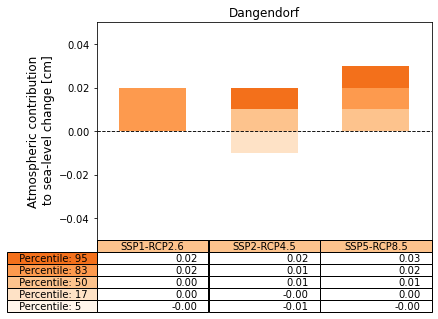

In [429]:
fig.summary_fig_and_table(percentiles['Dangendorf'].T, wind_model = 'Dangendorf')

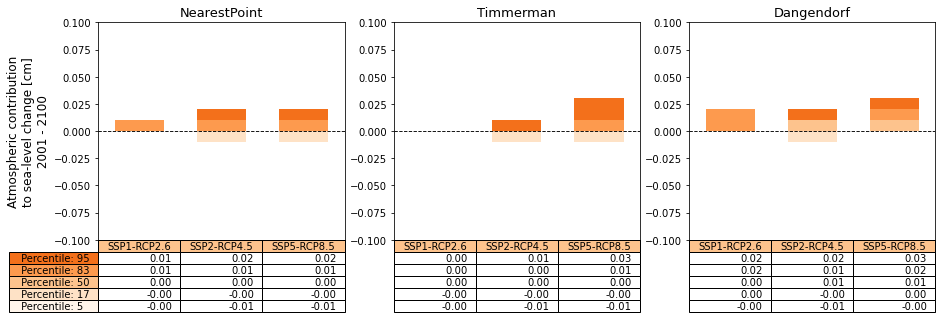

In [430]:
fig.summary_fig_and_table_all_wind_models(percentiles)

There is no significant long term change of atmospheric contribution to sea level over the 21st century. The observed wind influence is probably a natural variability

#### 1901 - 2000

In [431]:
percentiles_19 = fig.make_percentile_df(scenarios_comp, sce_labels, sce_names, year_s = 1900.5, year_e = 2000.5)

In [432]:
fig.summary_fig_and_table_all_wind_models(percentiles_19, period = '1901 - 2000', name = '1901_2000', ymin=-0.1, ymax=0.1)

TypeError: tuple indices must be integers or slices, not str

#### Different periods (50 years)

In [ ]:
years = [1900.5, 1950.5, 2000.5, 2050.5]
period = 50

for year in years:
    percentiles = fig.make_percentile_df(scenarios_comp, sce_labels, sce_names, year_s = year, year_e = year+period)
    year = round(year)
    fig.summary_fig_and_table_all_wind_models(percentiles, period = f'{year} - {year+period}', name = f'{year}_{year+period}', 
                                              ymin = -0.1, ymax=0.1)


#### Different periods (25 years)

In [ ]:
years = [1900.5, 1925.5, 1950.5, 1975.5, 2000.5, 2025.5, 2050.5, 2075.5]
period = 25

for year in years:
    percentiles = fig.make_percentile_df(scenarios_comp, sce_labels, sce_names, year_s = year, year_e = year+period)
    year = round(year)
    fig.summary_fig_and_table_all_wind_models(percentiles, period = f'{year} - {year+period}', name = f'{year}_{year+period}', 
                                              ymin = -0.1, ymax=0.1)


In [ ]:
0.4*80

In [ ]:
-0.1*80